This notebook performs a lightweight exploratory data analysis (EDA) on a
subset of the cleaned dataset used by our RAG pipeline. The purpose is to
validate data integrity (columns, ranges, missingness) and demonstrate
basic CO₂ and temperature trends using the United States and Canada as
a representative example. The overall pipeline is designed to support
additional countries without structural changes.


In [1]:
# Basic imports for EDA
import pandas as pd
import matplotlib.pyplot as plt


In [2]:
# Load the cleaned ETL dataset (relative path from /notebooks)
DATA_PATH = "/workspaces/EcoNauts-Climate-RAG/data/etl_cleaned_dataset.csv"
df = pd.read_csv(DATA_PATH)

print("Loaded dataset shape:", df.shape)
df.head()

Loaded dataset shape: (68, 5)


,country,year,co2,co2_per_capita,temp_anomaly
0,Canada,1990,458.015,16.482,-1.268793
1,Canada,1991,449.756,15.973,-0.611696
2,Canada,1992,463.497,16.263,-1.211659
3,Canada,1993,464.160,16.100,-0.669512
4,Canada,1994,478.631,16.421,-0.584032


In [3]:
# Quick schema check: columns, dtypes, missing values
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 68 entries, 0 to 67
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   country         68 non-null     object 
 1   year            68 non-null     int64  
 2   co2             68 non-null     float64
 3   co2_per_capita  68 non-null     float64
 4   temp_anomaly    68 non-null     float64
dtypes: float64(3), int64(1), object(1)
memory usage: 2.8+ KB


In [4]:
# Summary statistics for numeric columns (sanity check)
df.describe()


,year,co2,co2_per_capita,temp_anomaly
count,68.000000,68.000000,68.000000,68.000000
mean,2006.500000,3032.385279,17.490662,0.047619
std,9.883652,2522.940431,2.161419,0.697456
min,1990.000000,449.756000,13.795000,-1.268793
25%,1998.000000,558.744000,15.969250,-0.453469
50%,2006.500000,2653.258500,17.166500,-0.048131
75%,2015.000000,5480.299250,19.788500,0.487459
max,2023.000000,6132.183000,21.352000,2.010592


In [5]:
# Verify expected countries and year range
print("Countries in dataset:")
print(df["country"].value_counts())

print("\nYear range:")
print("min year =", df["year"].min())
print("max year =", df["year"].max())


Countries in dataset:
country
Canada           34
United States    34
Name: count, dtype: int64

Year range:
min year = 1990
max year = 2023


In [6]:
# Check missingness (important for downstream ingestion/embeddings)
missing = df.isna().sum().sort_values(ascending=False)
missing[missing > 0]


Series([], dtype: int64)

In [ ]:
# Basic duplicates check (country-year should be unique for clean annual data)
dup_count = df.duplicated(subset=["country", "year"]).sum()
print("Duplicate (country, year) rows:", dup_count)

Duplicate (country, year) rows: 0


In [8]:
# Create a simple subset for the two target countries
us = df[df["country"] == "United States"].sort_values("year")
ca = df[df["country"] == "Canada"].sort_values("year")

print("US rows:", us.shape[0])
print("Canada rows:", ca.shape[0])


US rows: 34
Canada rows: 34


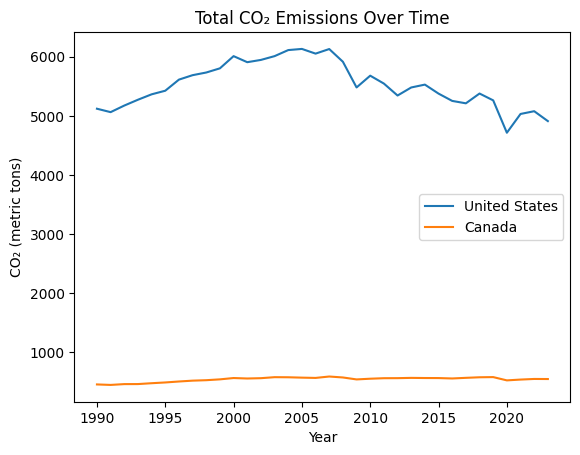

In [9]:
# Plot total CO₂ emissions over time (trend comparison)
plt.figure()
plt.plot(us["year"], us["co2"], label="United States")
plt.plot(ca["year"], ca["co2"], label="Canada")
plt.title("Total CO₂ Emissions Over Time")
plt.xlabel("Year")
plt.ylabel("CO₂ (metric tons)")
plt.legend()
plt.show()


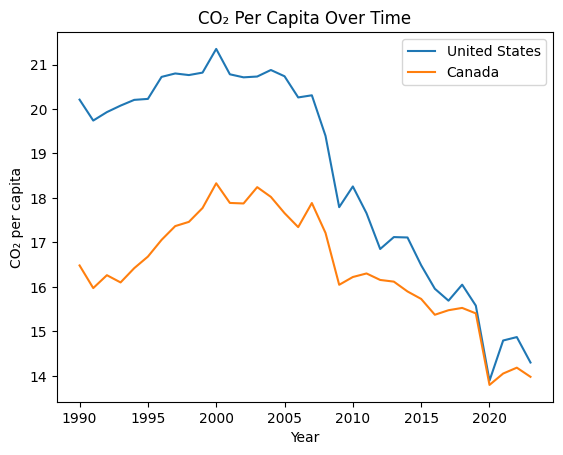

In [10]:
# Plot CO₂ per capita over time (often more interpretable than totals)
plt.figure()
plt.plot(us["year"], us["co2_per_capita"], label="United States")
plt.plot(ca["year"], ca["co2_per_capita"], label="Canada")
plt.title("CO₂ Per Capita Over Time")
plt.xlabel("Year")
plt.ylabel("CO₂ per capita")
plt.legend()
plt.show()


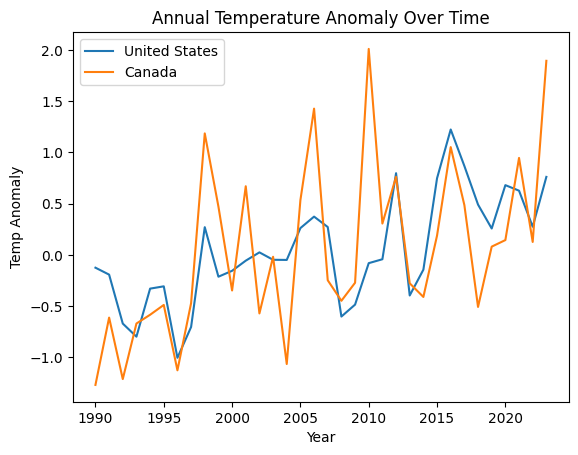

In [11]:
# Plot temperature anomaly over time (optional but useful context)
plt.figure()
plt.plot(us["year"], us["temp_anomaly"], label="United States")
plt.plot(ca["year"], ca["temp_anomaly"], label="Canada")
plt.title("Annual Temperature Anomaly Over Time")
plt.xlabel("Year")
plt.ylabel("Temp Anomaly")
plt.legend()
plt.show()


- The dataset contains annual records by `country` and `year`, with CO₂ metrics and temperature anomaly.
- The key integrity checks above confirm:
  - Expected country coverage (US + Canada)
  - Reasonable year range
  - No unexpected duplicate `country-year` rows
  - Missingness is visible and can be handled downstream if needed
  